# NAC playground

This file can be used to perform minor experiments related to NAC-coloring search.

It requires both the `nac` and `pyrigi` packages.
Either install it using `pip install pyrigi==0.3.0` or clone it into the project root directory from https://github.com/PyRigi/PyRigi/tree/0.3.0.

In [25]:
from typing import *
import importlib

import pyrigi
import nac as nac
import nac.util
from nac import MonochromaticClassType
from benchmarks import dataset
importlib.reload(nac)
importlib.reload(nac.util)
importlib.reload(dataset)

seed=42

In [26]:
class Strategies:
    NAIVE = "naive"
    CYCLES = "cycles"
    NONE_LINEAR = 'subgraphs-linear-none-6'
    NEIGHBORS_LINEAR = 'subgraphs-linear-neighbors-6'
    NEIGHBORS_DEGREE_LINEAR = 'subgraphs-linear-neighbors_degree-6'
    NEIGHBORS_SHARED_VERTICES = 'subgraphs-shared_vertices-neighbors-6'

In [27]:
G = pyrigi.graphDB.ThreePrism()

In [28]:
display(nac.has_NAC_coloring(G))

coloring = nac.single_NAC_coloring(G)
display(coloring)

True

([(0, 1), (0, 2), (1, 2), (3, 4), (3, 5), (4, 5)], [(0, 3), (1, 4), (2, 5)])

In [29]:
colorings = list(nac.NAC_colorings(
    G,
    algorithm=Strategies.NEIGHBORS_LINEAR,
))
display(colorings)

[([(3, 4), (3, 5), (4, 5), (0, 1), (0, 2), (1, 2)], [(0, 3), (1, 4), (2, 5)]),
 ([(0, 3), (1, 4), (2, 5)], [(3, 4), (3, 5), (4, 5), (0, 1), (0, 2), (1, 2)])]

In [30]:
def with_colors(coloring: nac.NACColoring):
    return {
        "red": coloring[0],
        "blue": coloring[1],
    }

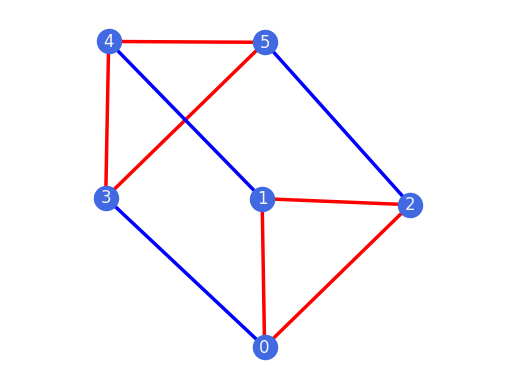

In [31]:
G.plot(edge_color=with_colors(coloring))